In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib_fontja

In [ ]:
### Excelデータを見てパラメータを設定
data_path = '../data/private/sample_data.xlsx'
sheet_name = 'N数'
col_start = 1
col_end = 102
row_start = 17
row_end = 118
drop_col_list = [2]
drop_row_list = [18]
drop_all_zero_col = False
drop_all_zero_rost = False

### Read data
df_full = pd.read_excel(data_path, sheet_name=sheet_name, header=row_start-1, index_col=col_start-1)

### Select a subset of the DataFrame
df_subset = df_full.iloc[:row_end-row_start, :col_end-col_start]

### Drop specified columns
if len(drop_col_list) > 0:
    df_subset.drop(columns=df_subset.columns[np.array(drop_col_list)-col_start-1], inplace=True)

### Drop specified rows
if len(drop_row_list) > 0:
    df_subset.drop(index=df_subset.index[np.array(drop_row_list)-row_start-1], inplace=True)

### Drop columns with all zero values
if drop_all_zero_col:
    df_subset = df_subset.loc[:, (df_subset != 0).any(axis=0)]

### Drop rows with all zero values
if drop_all_zero_rost:
    df_subset = df_subset.loc[(df_subset != 0).any(axis=1), :]

df_subset.head()

,model001,model002,model003,model004,model005,model006,model007,model008,model009,model010,...,model091,model092,model093,model094,model095,model096,model097,model098,model099,model100
model001,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
model002,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
model003,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
model004,0,0,0,0,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
model005,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


,modelA,modelB,modelC,modelABC
model046,1,0,4,5
model097,0,1,2,3
model068,1,1,0,2
model070,1,1,0,2
model076,0,1,1,2
model090,0,1,0,1
model087,0,0,1,1
model086,0,1,0,1
model083,0,0,1,1
model074,0,1,0,1


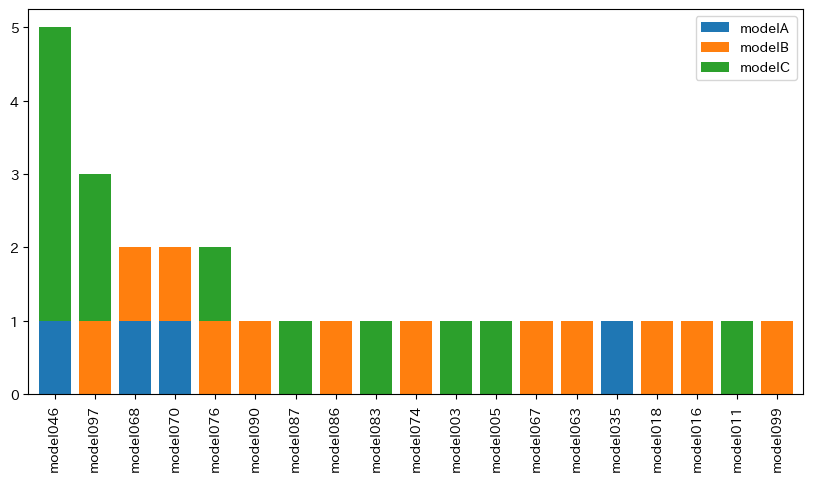

In [ ]:
### Analysis 1-1
target_list = ['model062', 'model063', 'model064', 'model065', 'model066']
totalling_param_list = [
    {'totalled_value_name': 'modelA',
     'totalling_values': ['model062']},
    {'totalled_value_name': 'modelB',
     'totalling_values': ['model063', 'model064']},
    {'totalled_value_name': 'modelC',
     'totalling_values': ['model065', 'model066']},
    {'totalled_value_name': 'modelABC',
     'totalling_values': ['modelA', 'modelB', 'modelC']},
]
sorted_target = 'modelABC'

### Select a subset of the DataFrame for analysis 1
df_analysis1_1 = df_subset[target_list]

### Totalling columns
df_analysis1_1_total = df_analysis1_1.copy()
for param in totalling_param_list:
    df_analysis1_1_total[param['totalled_value_name']] = df_analysis1_1_total[param['totalling_values']].sum(axis=1)
df_analysis1_1_total = df_analysis1_1_total[[param['totalled_value_name'] for param in totalling_param_list]]

### Drop rows with all zero values
df_analysis1_1_total = df_analysis1_1_total.loc[(df_analysis1_1_total != 0).any(axis=1), :]

### Sort the DataFrame by the specified column
df_analysis1_1_total.sort_values(by=sorted_target, ascending=False, inplace=True)

### Display the analysis result
display(df_analysis1_1_total)

### Figure
fig, ax = plt.subplots(figsize=(10, 5))
df_analysis1_1_total[['modelA', 'modelB', 'modelC']].plot(
    kind='bar', 
    stacked=True, 
    ax=ax, 
    width=0.8,
    legend=True
)
ax.set_xticklabels(df_analysis1_1_total.index)
ax.set_xlabel('')
ax.set_ylabel('')
ax.set_title('')
plt.legend()
plt.show()

,sum
model076,4
model087,4
model072,4
model036,3
model097,3
model079,3
model089,3
model084,3
model099,2
model078,2


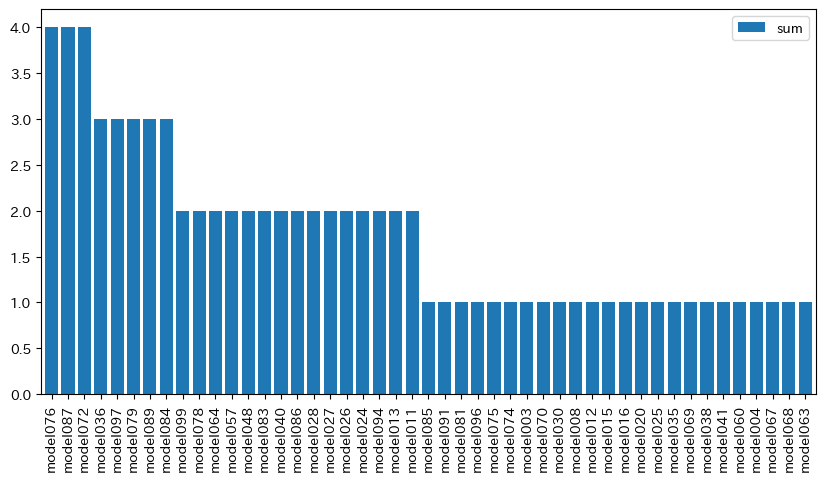

In [128]:
### Analysis 1-2
target_list = df_analysis1_1_total.index.tolist()

### Select a subset of the DataFrame for analysis 1
df_analysis1_2 = df_subset[target_list]

### Drop rows with all zero values
df_analysis1_2 = df_analysis1_2.loc[(df_analysis1_2 != 0).any(axis=1), :]

### Totalling
df_analysis1_2_total = pd.DataFrame(df_analysis1_2.sum(axis=1), columns=['sum'])

### Sort the DataFrame by the specified column
df_analysis1_2_total.sort_values(by='sum', ascending=False, inplace=True)

### Display the analysis result
display(df_analysis1_2_total)

### Figure
fig, ax = plt.subplots(figsize=(10, 5))
df_analysis1_2_total.plot(
    kind='bar', 
    ax=ax, 
    width=0.8,
)
ax.set_xticklabels(df_analysis1_2_total.index)
ax.set_xlabel('')
ax.set_ylabel('')
ax.set_title('')
plt.show()

,modelA,modelB,modelC,modelABC
model043,0,3,0,3
model089,0,2,0,2
model005,0,1,0,1
model054,0,0,1,1
model096,1,0,0,1
model093,1,0,0,1
model088,0,1,0,1
model063,0,1,0,1
model061,0,0,1,1
model058,0,0,1,1


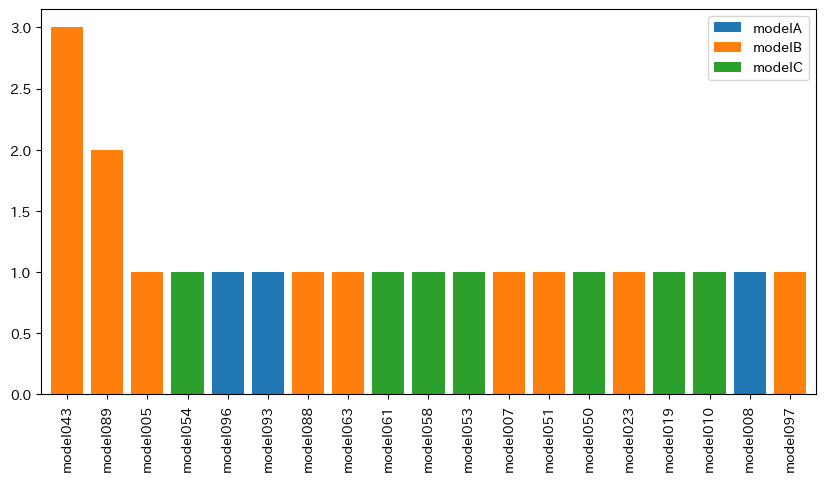

In [130]:
### Analysis 2-1
target_list = ['model062', 'model063', 'model064', 'model065', 'model066']
totalling_param_list = [
    {'totalled_value_name': 'modelA',
     'totalling_values': ['model062']},
    {'totalled_value_name': 'modelB',
     'totalling_values': ['model063', 'model064']},
    {'totalled_value_name': 'modelC',
     'totalling_values': ['model065', 'model066']},
    {'totalled_value_name': 'modelABC',
     'totalling_values': ['modelA', 'modelB', 'modelC']},
]
sorted_target = 'modelABC'

### Select a subset of the DataFrame for analysis 2
df_analysis2_1 = df_subset.T[target_list]

### Totalling columns
df_analysis2_1_total = df_analysis2_1.copy()
for param in totalling_param_list:
    df_analysis2_1_total[param['totalled_value_name']] = df_analysis2_1_total[param['totalling_values']].sum(axis=1)
df_analysis2_1_total = df_analysis2_1_total[[param['totalled_value_name'] for param in totalling_param_list]]

### Drop rows with all zero values
df_analysis2_1_total = df_analysis2_1_total.loc[(df_analysis2_1_total != 0).any(axis=1), :]

### Sort the DataFrame by the specified column
df_analysis2_1_total.sort_values(by=sorted_target, ascending=False, inplace=True)

### Display the analysis result
display(df_analysis2_1_total)

### Figure
fig, ax = plt.subplots(figsize=(10, 5))
df_analysis2_1_total[['modelA', 'modelB', 'modelC']].plot(
    kind='bar', 
    stacked=True, 
    ax=ax, 
    width=0.8,
    legend=True
)
ax.set_xticklabels(df_analysis2_1_total.index)
ax.set_xlabel('')
ax.set_ylabel('')
ax.set_title('')
plt.legend()
plt.show()

,sum
model064,7
model009,6
model086,6
model063,5
model078,4
...,...
model046,1
model050,1
model059,1
model057,1


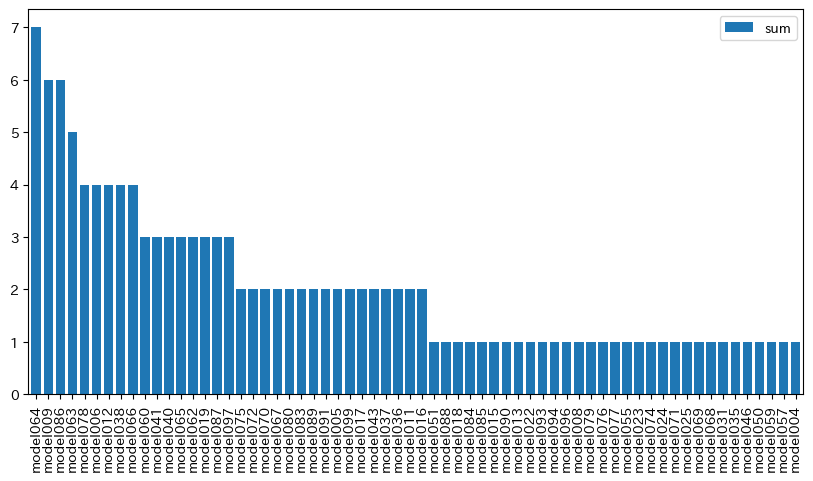

In [131]:
### Analysis 1-2
target_list = df_analysis2_1_total.index.tolist()

### Select a subset of the DataFrame for analysis 1
df_analysis2_2 = df_subset[target_list]

### Drop rows with all zero values
df_analysis2_2 = df_analysis2_2.loc[(df_analysis2_2 != 0).any(axis=1), :]

### Totalling
df_analysis2_2_total = pd.DataFrame(df_analysis2_2.sum(axis=1), columns=['sum'])

### Sort the DataFrame by the specified column
df_analysis2_2_total.sort_values(by='sum', ascending=False, inplace=True)

### Display the analysis result
display(df_analysis2_2_total)

### Figure
fig, ax = plt.subplots(figsize=(10, 5))
df_analysis2_2_total.plot(
    kind='bar', 
    ax=ax, 
    width=0.8,
)
ax.set_xticklabels(df_analysis2_2_total.index)
ax.set_xlabel('')
ax.set_ylabel('')
ax.set_title('')
plt.show()

,Analysis1-1,Analysis1-2,Analysis2-1,Analysis2-2,Total
model097,3,3,1,3,10
model064,0,2,0,7,9
model086,1,2,0,6,9
model087,1,4,0,3,8
model063,1,1,1,5,8
...,...,...,...,...,...
model077,0,0,0,1,1
model061,0,0,1,0,1
model059,0,0,0,1,1
model053,0,0,1,0,1


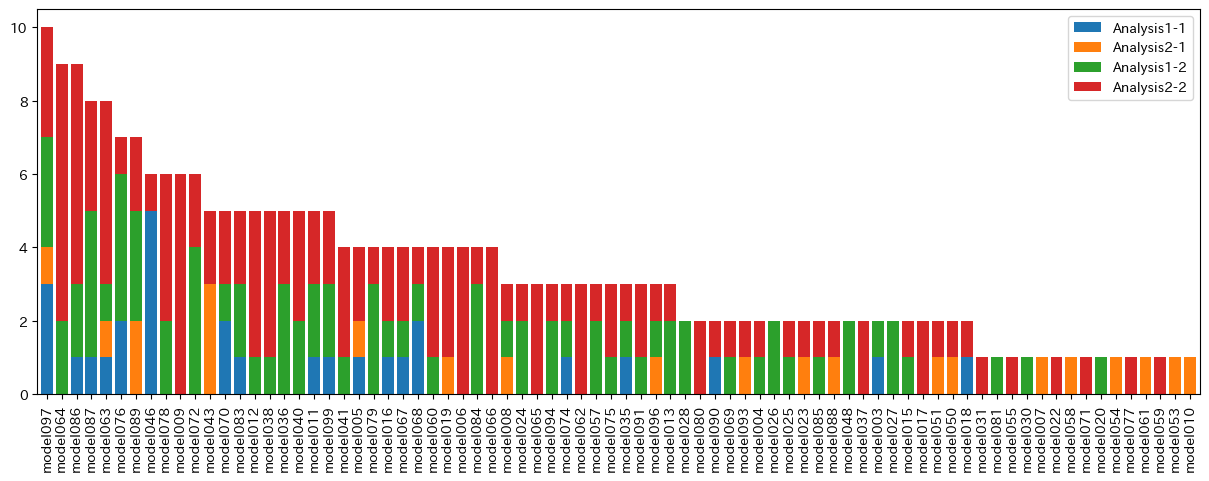

In [135]:
### Result
result_analysis1_1 = df_analysis1_1_total.index.tolist()
result_analysis1_2 = df_analysis1_2_total.index.tolist()
result_analysis2_1 = df_analysis2_1_total.index.tolist()
result_analysis2_2 = df_analysis2_2_total.index.tolist()
merged_list = list(set(result_analysis1_1 + result_analysis1_2 + result_analysis2_1 + result_analysis2_2))

result = pd.DataFrame(
    {
        'Analysis1-1': [df_analysis1_1_total.loc[idx, 'modelABC'] if idx in df_analysis1_1_total.index else 0 for idx in merged_list],
        'Analysis1-2': [df_analysis1_2_total.loc[idx, 'sum'] if idx in df_analysis1_2_total.index else 0 for idx in merged_list],
        'Analysis2-1': [df_analysis2_1_total.loc[idx, 'modelABC'] if idx in df_analysis2_1_total.index else 0 for idx in merged_list],
        'Analysis2-2': [df_analysis2_2_total.loc[idx, 'sum'] if idx in df_analysis2_2_total.index else 0 for idx in merged_list],
    },
    index=merged_list
)

result['Total'] = result.sum(axis=1)
result.sort_values(by='Total', ascending=False, inplace=True)

display(result)
### Figure
fig, ax = plt.subplots(figsize=(15, 5))
result[['Analysis1-1', 'Analysis2-1', 'Analysis1-2', 'Analysis2-2']].plot(
    kind='bar', 
    stacked=True, 
    ax=ax, 
    width=0.8,
    legend=True
)
ax.set_xticklabels(result.index)
ax.set_xlabel('')
ax.set_ylabel('')
ax.set_title('')
plt.legend()
plt.show()

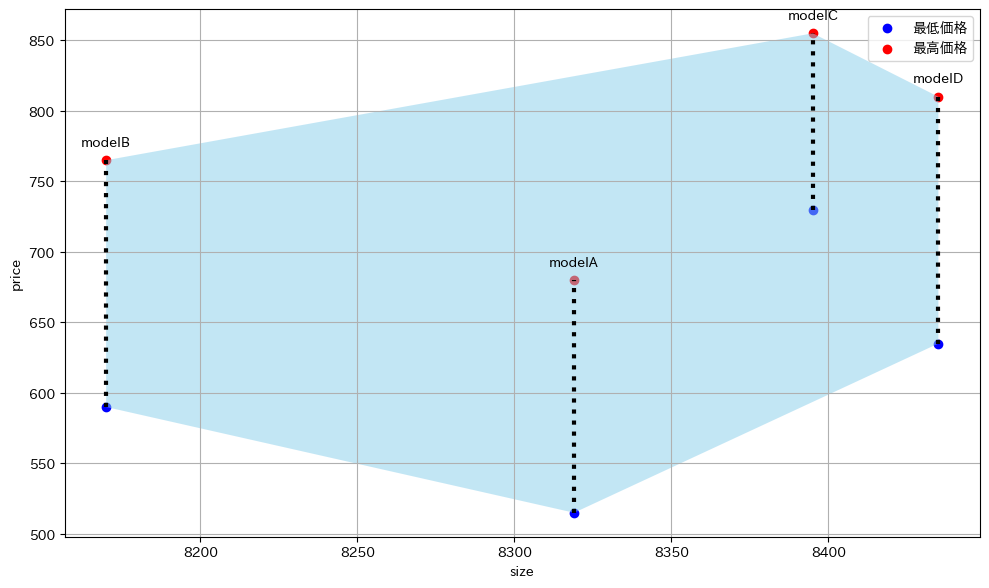

In [123]:
# データの定義
data = {
    "車種": ["modelA", "modelB", "modelC", "modelD"],
    "最低価格": [515, 590, 730, 635],
    "最高価格": [680, 765, 855, 810],
    "サイズ": [8319, 8170, 8395, 8435]
}
df = pd.DataFrame(data)

# 価格レンジを縦棒で描画
plt.figure(figsize=(10, 6))
for i, row in df.iterrows():
    plt.plot([row["サイズ"], row["サイズ"]],
             [row["最低価格"], row["最高価格"]],
             color="k", linewidth=3, linestyle="dotted",)
    
    plt.scatter(row["サイズ"], row["最低価格"], color="blue",
                label="最低価格" if i == 0 else "")
    plt.scatter(row["サイズ"], row["最高価格"], color="red",
                label="最高価格" if i == 0 else "")
    
    plt.text(row["サイズ"], row["最高価格"] + 10,
             row["車種"], ha="center", fontsize=10)
# --- 「領域っぽい」点線 (凸包) ------------------------------------
# 1. 価格レンジの上下端8点を作成
points = []
for _, row in df.iterrows():
    points.append((row["サイズ"], row["最低価格"]))
    points.append((row["サイズ"], row["最高価格"]))
points = np.array(points)

# 2. 凸包を計算 (Andrew's monotone chain algorithm)
def cross(o, a, b):
    return (a[0]-o[0])*(b[1]-o[1]) - (a[1]-o[1])*(b[0]-o[0])

points_sorted = sorted(points.tolist())  # x→yでソート
lower = []
for p in points_sorted:
    while len(lower) >= 2 and cross(lower[-2], lower[-1], p) <= 0:
        lower.pop()
    lower.append(p)

upper = []
for p in reversed(points_sorted):
    while len(upper) >= 2 and cross(upper[-2], upper[-1], p) <= 0:
        upper.pop()
    upper.append(p)

hull = np.array(lower[:-1] + upper[:-1])  # 最後の点重複を除く

# 3. 凸包を点線で囲み、塗りつぶし (薄い水色)
#plt.fill(hull[:, 0], hull[:, 1], facecolor="none",
         #edgecolor="k", linestyle="--", linewidth=1.5)
plt.fill(hull[:, 0], hull[:, 1], facecolor="skyblue", alpha=0.5)

# ---------------------------------------------------------------

plt.xlabel("size")
plt.ylabel("price")
plt.title("")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [112]:
hull

array([[8170,  590],
       [8319,  515],
       [8435,  635],
       [8435,  810],
       [8395,  855],
       [8170,  765]])